## Background

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### Data Fields

$datetime$ - hourly date + timestamp  
$season$ -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

$holiday$ - whether the day is considered a holiday

$workingday$ - whether the day is neither a weekend nor holiday

$weather$ - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

$temp$ - temperature in Celsius

$atemp$ - "feels like" temperature in Celsius

$humidity$ - relative humidity

$windspeed$ - wind speed

$casual$ - number of non-registered user rentals initiated

$registered$ - number of registered user rentals initiated

$count$ - number of total rentals

## #import data

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print('trainning data set:',train.shape)
print('testting data set:',test.shape)

trainning data set: (10886, 12)
testting data set: (6493, 9)


##  #data explore

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


## #Data Engineering

In [13]:
from datetime import datetime

In [14]:
bike_data = train

In [20]:
bike_data['date'] = bike_data.datetime.apply(lambda x:x.split()[0])
bike_data['year'] = bike_data.datetime.apply(lambda x:x.split('-')[0]).astype('int')
bike_data['month'] = bike_data.datetime.apply(lambda x:x.split('-')[1]).astype('int')
bike_data['month'] = bike_data.datetime.apply(lambda x:x.split('-')[1]).astype('int')
bike_data['weekday'] = bike_data.datetime.apply(lambda x:pd.to_datetime(x).weekday())                                             
bike_data['hour'] = bike_data.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')


In [21]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,5,4


In [22]:
corrDf = bike_data.corr()
corrDf

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,-0.024804,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.246959,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,-0.084427,0.380540


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

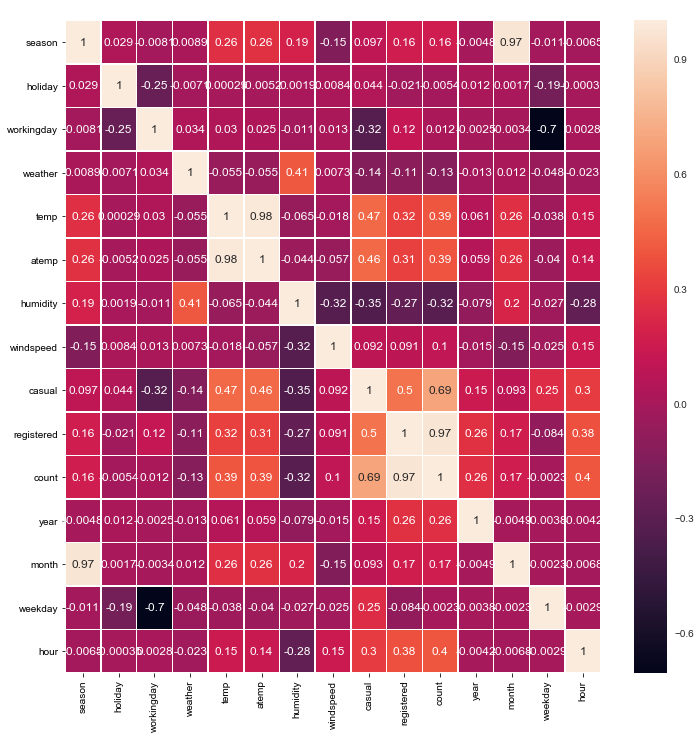

In [25]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
sns.set(style='dark')
sns.heatmap(corrDf,ax=ax,vmax=1,square=False,annot=True,linewidth=.5)
plt.title('Heatmap on correlation',color='white')
plt.show()

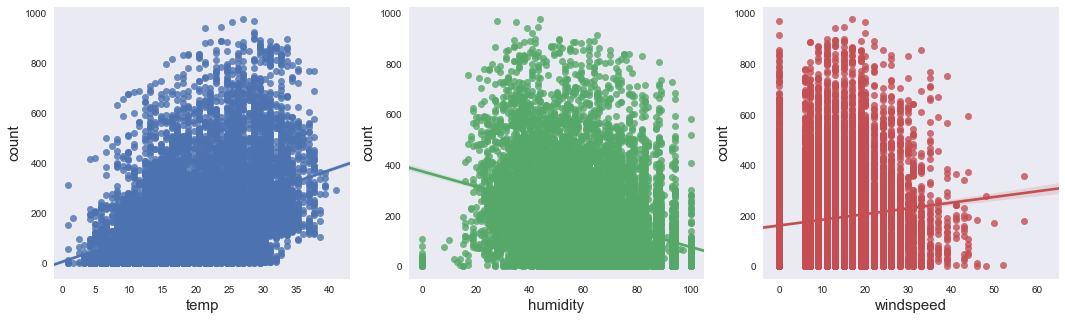

In [31]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(18,5))
sns.set(style='white')
sns.despine()

ax1 = sns.regplot(x='temp',y='count',data=bike_data,ax=ax1)
ax2 = sns.regplot(x='humidity',y='count',data=bike_data,ax=ax2)
ax3 = sns.regplot(x='windspeed',y='count',data=bike_data,ax=ax3)

ax1.set_xlabel('temp',fontsize=15)
ax1.set_ylabel('count',fontsize=15)
ax2.set_xlabel('humidity',fontsize=15)
ax2.set_ylabel('count',fontsize=15)
ax3.set_xlabel('windspeed',fontsize=15)
ax3.set_ylabel('count',fontsize=15)

plt.show()

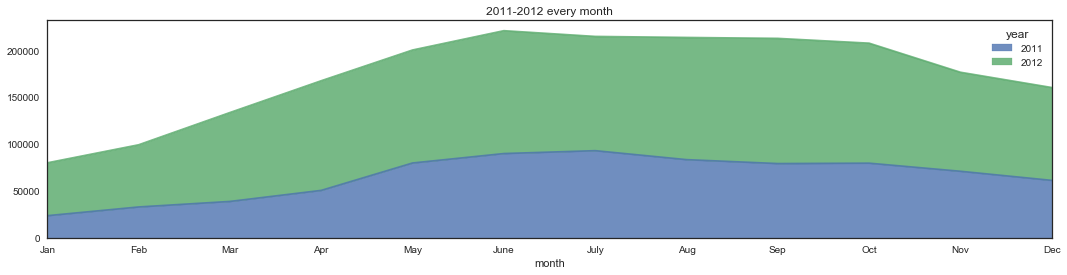

In [36]:
fig = plt.subplots(figsize=(18,4))
ax4 = plt.subplot(111)
df4 = bike_data.groupby(['month','year']).sum().unstack()['count']
df4.plot(kind='area',ax=ax4,alpha=0.8)
ax4.set_title('2011-2012 every month')
ax4.set_xticks(list(range(13)))
ax4.set_xticklabels(['','Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
ax4.set_xlim(1,12)
plt.show()

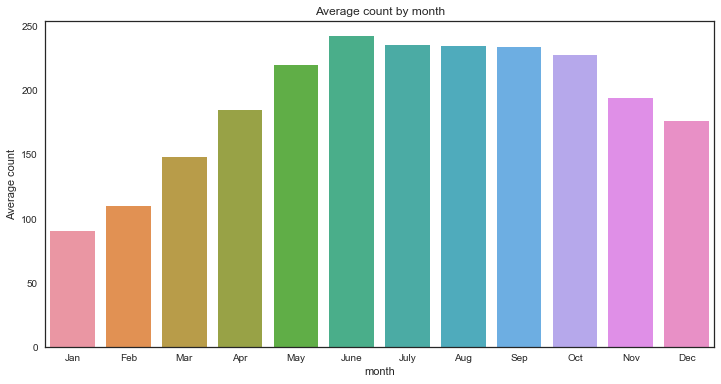

In [40]:
fig = plt.subplots(figsize=(12,6))
ax5 = plt.subplot(111)
monthDict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df5 = pd.DataFrame(bike_data.groupby('month')['count'].mean()).reset_index()
df5["month_word"]=df5['month'].map(monthDict)
sns.barplot(data=df5,x="month_word",y="count",ax=ax5)
ax5.set(xlabel='month',ylabel='Average count',title='Average count by month')
plt.show()

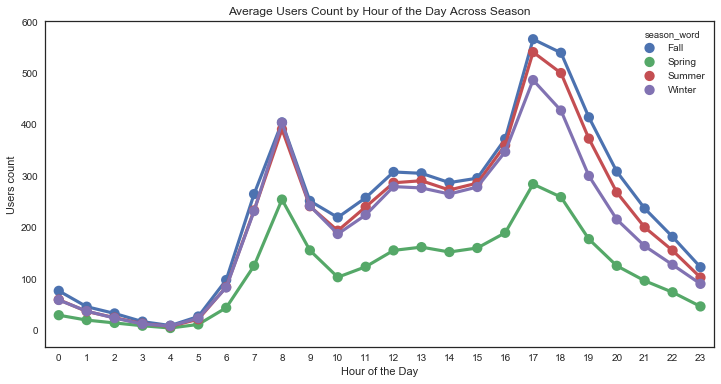

In [44]:
seasonDict={1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
bike_data['season_word']=bike_data['season'].map(seasonDict)

fig = plt.subplots(figsize=(12,6))
ax6 = plt.subplot(111)

df6 = pd.DataFrame(bike_data.groupby(['hour','season_word'])['count'].mean()).reset_index()
sns.pointplot(x=df6['hour'],y=df6['count'],hue=df6['season_word'],ax=ax6,data=df6,join=True)
ax6.set(xlabel='Hour of the Day',ylabel='Users count',title='Average Users Count by Hour of the Day Across Season',label='big')
plt.show()

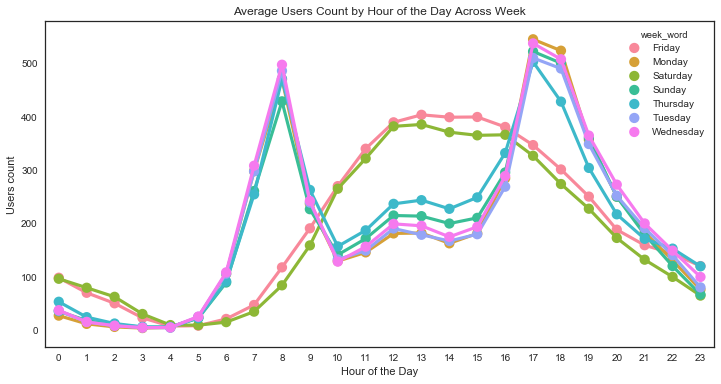

In [45]:
weekDict={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
bike_data['week_word']=bike_data['weekday'].map(weekDict)

fig = plt.subplots(figsize=(12,6))
ax7 = plt.subplot(111)

df7 = pd.DataFrame(bike_data.groupby(['hour','week_word'])['count'].mean()).reset_index()
sns.pointplot(x=df7['hour'],y=df7['count'],hue=df7['week_word'],ax=ax7,data=df7)
ax7.set(xlabel='Hour of the Day',ylabel='Users count',title='Average Users Count by Hour of the Day Across Week',label='big')
plt.show()

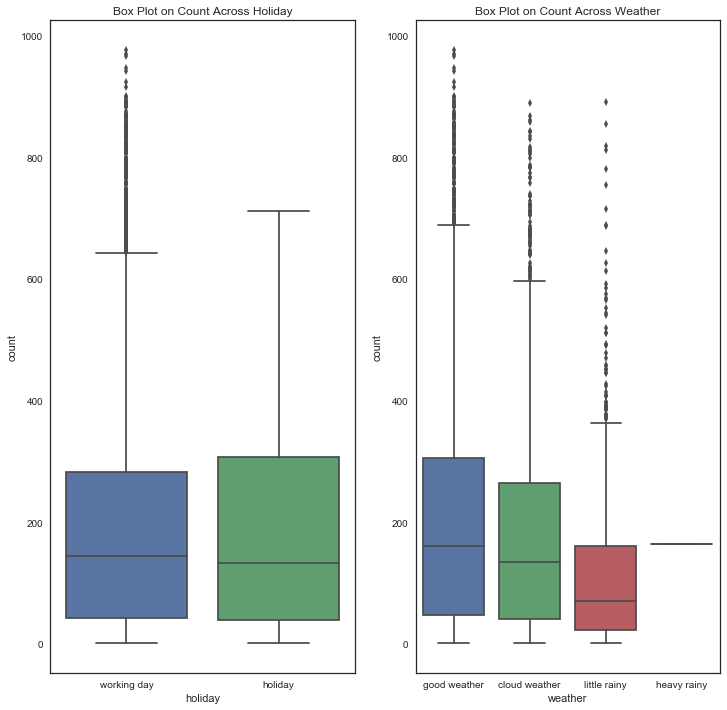

In [47]:
fig,(ax8,ax9)=plt.subplots(1,2)
fig.set_size_inches(12,12)

holidayDict = {1:'holiday',0:'working day'}
bike_data['holiday_word']=bike_data['holiday'].map(holidayDict)
ax8 = sns.boxplot(x='holiday_word',y='count',data=bike_data,orient='v',ax=ax8)
ax8.set(xlabel='holiday',ylabel='count',title='Box Plot on Count Across Holiday')

weatherDict = {1:'good weather',2:'cloud weather',3:'little rainy',4:'heavy rainy'}
bike_data['weather_word']= bike_data['weather'].map(weatherDict)
ax9 = sns.boxplot(x='weather_word',y='count',data=bike_data,orient='v',ax=ax9)
ax9.set(xlabel='weather',ylabel='count',title='Box Plot on Count Across Weather')
plt.show()